## **import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the CSV file**

In [ ]:

df = pd.read_csv('/content/Advertising_2023.csv')

df.rename(columns={
    'digital': 'Digital',
    'radio': 'Radio',
    'newspaper': 'Newspaper',
    'sales': 'Sales'
}, inplace=True)

print("\nColumn names:", df.columns)
print("\nMissing values:\n", df.isnull().sum())


   Unnamed: 0  Digital     TV  Radio  Newspaper  Sales
0           1   345.15  156.0   37.8       69.2   22.1
1           2    66.75   46.0   39.3       45.1   10.4
2           3    25.80   18.3   45.9       69.3    9.3
3           4   227.25  145.1   41.3       58.5   18.5
4           5   271.20  165.2   10.8       58.4   12.9

Column names: Index(['Unnamed: 0', 'Digital', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Missing values:
 Unnamed: 0    0
Digital       0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Digital,0
TV,0
Radio,0
Newspaper,0
Sales,0
Total_Spend,0
ROI (%),0


### **Calculate Total Spend and ROI**

In [ ]:
df['Total_Spend'] = df[['TV', 'Digital', 'Radio', 'Newspaper']].sum(axis=1)
df['ROI (%)'] = ((df['Sales'] - df['Total_Spend']) / df['Total_Spend']) * 100

df[['TV', 'Digital', 'Radio', 'Newspaper', 'Sales', 'Total_Spend', 'ROI (%)']].head()


,TV,Digital,Radio,Newspaper,Sales,Total_Spend,ROI (%)
0,156.0,345.15,37.8,69.2,22.1,608.15,-96.366028
1,46.0,66.75,39.3,45.1,10.4,197.15,-94.724829
2,18.3,25.80,45.9,69.3,9.3,159.30,-94.161959
3,145.1,227.25,41.3,58.5,18.5,472.15,-96.081754
4,165.2,271.20,10.8,58.4,12.9,505.60,-97.448576


### **Channel-wise Average ROI**

In [ ]:
 channel_rois = {}

for channel in ['TV', 'Digital', 'Radio', 'Newspaper']:
    channel_rois[channel] = ((df['Sales'] - df[channel]) / df[channel]).mean() * 100

roi_df = pd.DataFrame(channel_rois, index=['Average ROI (%)']).T
roi_df = roi_df.sort_values(by='Average ROI (%)', ascending=False)
roi_df


,Average ROI (%)
Radio,inf
Newspaper,31.945757
Digital,-36.714435
TV,-83.275375


### **Visualize ROI by Channel**

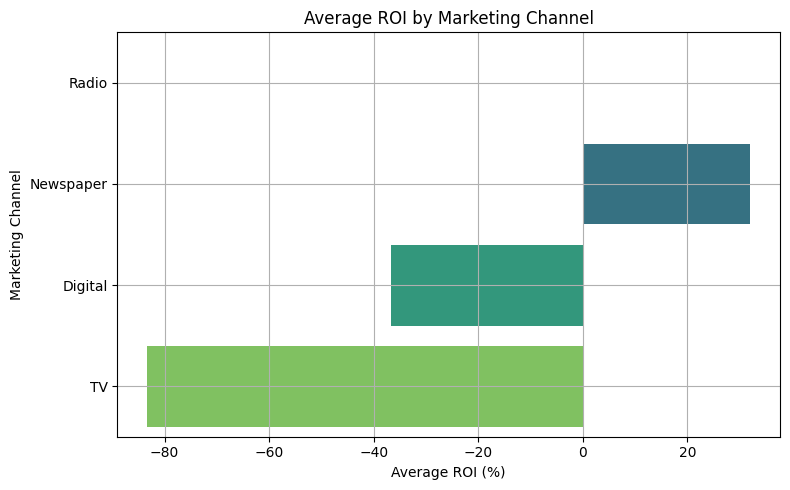

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Average ROI (%)',
    y=roi_df.index,
    data=roi_df.reset_index().rename(columns={'index': 'Channel'}),
    palette='viridis',
    hue='Channel',
    dodge=False,
    legend=False
)
plt.title('Average ROI by Marketing Channel')
plt.xlabel('Average ROI (%)')
plt.ylabel('Marketing Channel')
plt.grid(True)
plt.tight_layout()
plt.show()
